<a href="https://colab.research.google.com/github/eduglez03/RedesNeuronales/blob/main/EtapasDeUnProyectoDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Etapas de un proyecto Deep Learning



## Inicialización

In [ ]:
# Importamos todos los paquetes Python que vamos a usar
%tensorflow_version 2.x
import tensorflow as tf

print(tf.__version__)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.18.0


## Descarga datos Auto MPG

In [ ]:
# Descargamos los datos desde el repositorio de la Universidad de California en Irvine
dataset_path = tf.keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [ ]:
# Importamos los datos usando Pandas para su manipulación y análisis
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',   'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()

In [ ]:
# La función tail() de Pandas nos permite visualizar los datos empezando por la parte baja de la tabla
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [ ]:
# La función head() de Pandas nos permite visualizar los datos empezando por la parte alta de la tabla
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
# La funcion isna() nos permite saber si dentro del conjunto de datos, faltan datos
# En este caso podemos ver como faltan 6 datos de la categoria Horsepower
print(dataset.isna().sum())

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


In [ ]:
# El método dropna() nos permite eliminar las filas en las que faltan datos
dataset = dataset.dropna()

In [ ]:
# La columna de datos Origin del DataSet no es numérica sino Categórica, cuando sucede eso se usa habitualmente la técnica de codificación
# one-hot. Basicamente consiste en crear una característica "ficticia" para cada valor único en la columna de características
# Esta codificación asigna a los datos de entrada su propio vector y les da un valor de 1 o 0.

# El método pop() nos permite extraer los datos de la columna Origin
origin = dataset.pop('Origin')

# Sustituimos estos datos por tres nuevas columnas
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


## Separar los datos para entrenar y evaluar

In [ ]:
# Dividimos el conjunto de datos en datos de entrenamiento y datos de prueba
# Mediante el método sample(), indicamos el parámetro del porcentaje de datos que queremos reservar
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
# También debemos separar la columna de datos que contiene los valores que queremos predecir
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [ ]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [ ]:
# Definimos esta funcion que nos permite normalizar los datos tanto de entrenamiento como de prueba
# Esta función reescala las carcaterísticas en un rango [0,1] (normalización) y centra las columnas de características con respecto a una media 0 con desvación estandar 1 (estandarización)
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

# Aplicamos esta función a los datos de entrenamiento y prueba
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [ ]:
# Comprobamos que los datos se han normalizado y estandarizado correctamente
normed_train_stats = normed_train_data.describe()
normed_train_stats = normed_train_stats.transpose()
normed_train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,1.725442e-16,1.0,-1.457657,-0.869348,-0.869348,1.483887,1.483887
Displacement,314.0,8.344351e-17,1.0,-1.220325,-0.860894,-0.424785,0.675074,2.489002
Horsepower,314.0,-1.131437e-17,1.0,-1.545283,-0.751241,-0.272190,0.607162,3.153347
Weight,314.0,-8.485781e-17,1.0,-1.589352,-0.869478,-0.198782,0.732017,2.547401
Acceleration,314.0,-5.148041e-16,1.0,-2.710152,-0.630725,-0.021237,0.588250,3.313017
Model Year,314.0,9.461646e-16,1.0,-1.604642,-0.788458,0.027726,0.843910,1.660094
USA,314.0,7.071484e-17,1.0,-1.286751,-1.286751,0.774676,0.774676,0.774676
Europe,314.0,5.657187e-17,1.0,-0.465148,-0.465148,-0.465148,-0.465148,2.143005
Japan,314.0,-1.980016e-17,1.0,-0.495225,-0.495225,-0.495225,-0.495225,2.012852


## Desarrollar el modelo

In [ ]:
# Desarrollamos el modelo. En este caso lo hemos encpasulado en una función para poder porbar con distintos hiperparámetros
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

def build_model():
  model = Sequential()
  model.add(Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(1))
  return model

# Llamamos a la función para construir el modelo
model = build_model()
# El método summary nos permite ver la información de la red construida
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,865 (19.00 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Definimos el optimizador, en este caso usaremos el RMSprop con un ratio de aprendizaje de 0.001
optimizer = tf.keras.optimizers.RMSprop(0.001)

In [ ]:
# Configuración del modelo, con función de pérdida mse y el optimizador definido, y las métricas de mae y mse
model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

##Entrenamiento del modelo

In [ ]:
# Definimos el número de épocas (epochs)
EPOCHS = 1000

# Entrenamos el modelo con ese número de epoch y rservando un 20% (0.2) de los datos del conjunto de entrenamiento para llevar a cabo la validación del modelo
history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0)

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use

## Evaluación el modelo

In [ ]:
# El método fit() de entrenamiento nos devuleve un historial con las estadisticas del entrenamiento almacenadas
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.694818,1.033378,2.694818,10.063521,2.424711,10.063521,995
996,2.493940,1.024833,2.493940,9.677763,2.393271,9.677763,996
997,2.444594,0.975465,2.444594,10.045356,2.458621,10.045356,997
998,2.498721,0.986960,2.498721,9.866932,2.435768,9.866932,998
999,2.733444,1.099965,2.733444,10.058270,2.452095,10.058270,999


In [ ]:
# Para ver como evolucionan estos valores durante el entrenamiento podemos recurrir a este código
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],'r--',
           label='Training Error')
  plt.plot(hist['epoch'], hist['val_mse'],'b',
           label = 'Validation Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

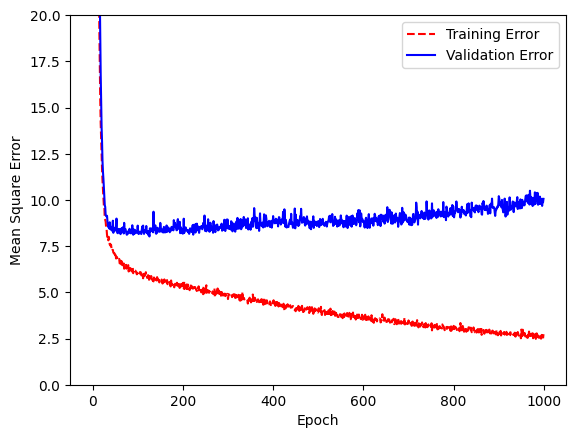

In [ ]:
# Mostramos la gráfica
plot_history(history)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

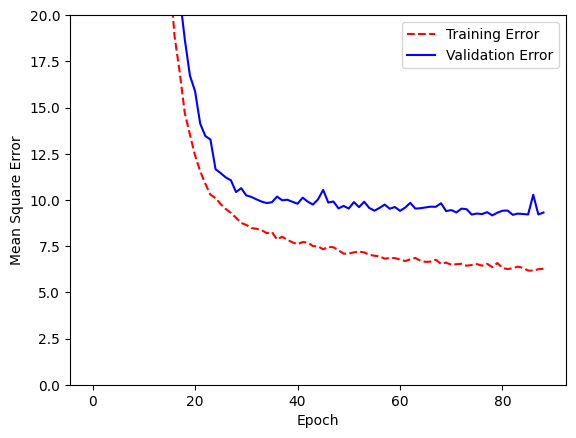

In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

model = build_model()
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

# Configuramos la funcion EarlyStopping con los parámetros necesarios
early_stop = tf.keras.callbacks.EarlyStopping(
      monitor='val_loss', patience=10)

# Entrenamos el modelo de nuevo
history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0,
                    callbacks=[early_stop] )

# Mostramos las gráficas
plot_history(history)


In [ ]:
loss, mse, mae = model.evaluate(normed_test_data, test_labels)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))
print("Testing set Mean Sqr Error: {:5.2f} MPG".format(mse))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 5.1131 - mae: 1.7568 - mse: 5.1131


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Testing set Mean Abs Error:  5.76 MPG
Testing set Mean Sqr Error:  1.88 MPG


Evaluación del entrenamiento con MAE

In [ ]:
model = build_model()
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss='mae',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0,
                    callbacks=[early_stop] )




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

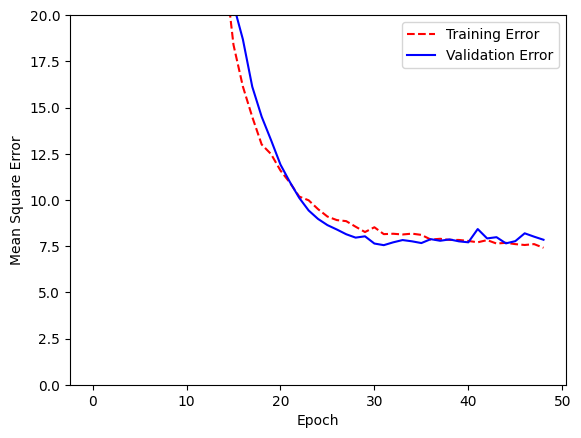

In [ ]:
plot_history(history)

In [ ]:
loss, mse, mae = model.evaluate(normed_test_data, test_labels)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))
print("Testing set Mean Sqr Error: {:5.2f} MPG".format(mse))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.5770 - mae: 1.5770 - mse: 5.2551


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Testing set Mean Abs Error:  5.50 MPG
Testing set Mean Sqr Error:  1.66 MPG
